<a href="https://colab.research.google.com/github/Sergio-Tellz21/upsrj-keras-workspace/blob/main/CNN_Dog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Red convolucional con keras para deteccion de perros
##Objetivo

Implementar una red neuronal convolucional que nos permita procesar iamgenes para dectectar a que clase pertenecen, especificamente, necesitamos aprender a diferenciar entre perros y gatos.

In [59]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.utils import to_categorical
from dataclasses import dataclass

1. **cargar y preparar los datos**
 Usaremos el dateset de ejemplo de [CIFAR-10] (https://www.cs.toronto.edu/~kriz/.html), el cual incluye 60000 imagenes a color de 32x32 pixeles en 10 por clases, con 6000 imagenens por clase.

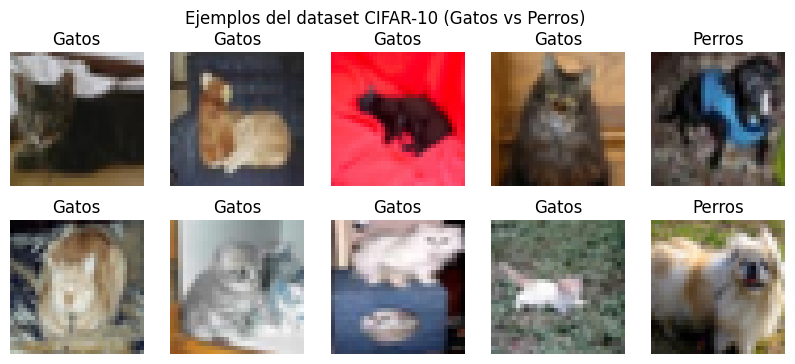

In [91]:
# cargamos base de datos de imagenes y dividimos en train data & test data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# estructura de datos
@dataclass
class gatos:
  id: int = 3
  label: str = "Gatos"

@dataclass
class perros:
  id: int = 5
  label: str = "Perros"

@dataclass
class caballos:
  id: int = 7
  label: str = "Caballos"

deseado = perros
no_deseado = gatos

# clases: 3 = gato, 5 = perro
mask_train = (y_train.flatten() == gatos.id) | (y_train.flatten() == perros.id)
mask_test = (y_test.flatten() == gatos.id) | (y_test.flatten() == perros.id)

# filtramos de la base de datos las clases deseadas
x_train, y_train = x_train[mask_train], y_train[mask_train]
x_test, y_test = x_test[mask_test], y_test[mask_test]

# normalización (0,1)
x_train = x_train / 255.0
x_test = x_test / 255.0

# convertimos etiquetas: gato = 0, perro = 1
y_train = (y_train == deseado.id).astype(int)
y_test = (y_test == deseado.id).astype(int)

# visualización de imágenes
fig, axes = plt.subplots(2, 5, figsize=(10,4))
for i, ax in enumerate(axes.flat):
  ax.imshow(x_train[i])
  ax.set_title(deseado.label if y_train[i] == 1 else no_deseado.label)
  ax.axis("off")
plt.suptitle(f"Ejemplos del dataset CIFAR-10 ({no_deseado.label} vs {deseado.label})")
plt.show()

2. **Ejecucion con DNN(poco eficiciente)**

En este caso especifico no es eeficiente utilizar una DNN para el analisis de nuestros dato esto debido a que el formato de los datos es de imagenes de 32x32 RGB, lo cual se traduce a 3072 neuronas por imagen, lo cual dado el numero de entradas, (50000) nos da en total 153,600,000 neuronas necesarias.

3.**Ejecución con CNN**

Dado el formato de los datos de entrada mencionados anetiormente, haremos una red neuronal convolucional(Cnn) para el analisis.


In [92]:
# Modelo DNN
model_dnn = Sequential()

# Input layer
model_dnn.add(Flatten(input_shape=(32,32,3)))
# Hidden layers
model_dnn.add(Dense(128, activation='relu'))
# Output layer
model_dnn.add(Dense(1, activation='sigmoid'))

# compilamos DNN
model_dnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# alimentamos DNN
history_dnn = model_dnn.fit(x_train, y_train, epochs=5, batch_size=64,
                            validation_data=(x_test, y_test), verbose=1)

Epoch 1/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.5324 - loss: 0.7726 - val_accuracy: 0.5550 - val_loss: 0.7004
Epoch 2/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5726 - loss: 0.6888 - val_accuracy: 0.5225 - val_loss: 0.7011
Epoch 3/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5733 - loss: 0.6787 - val_accuracy: 0.5940 - val_loss: 0.6612
Epoch 4/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5931 - loss: 0.6616 - val_accuracy: 0.5705 - val_loss: 0.6690
Epoch 5/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5976 - loss: 0.6578 - val_accuracy: 0.6025 - val_loss: 0.6577


In [93]:
from IPython.core import history
#model
model_cnn = Sequential()

#inputs
model_cnn.add(Conv2D(32, (3,3), activation="relu", input_shape=(32,32,3)))
# Hidden leayer
model_cnn.add(MaxPooling2D((2,2)))
model_cnn.add(Conv2D(64, (3,3), activation="relu"))
model_cnn.add(MaxPooling2D((2,2)))
model_cnn.add(Flatten())
model_cnn.add(Dense(64, activation="relu"))
model_cnn.add(Dropout(0.5))
# output layer
model_cnn.add(Dense(1, activation="sigmoid"))

##Compilamos
model_cnn.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

##alimentamos
history_cnn = model_cnn.fit(x_train, y_train, epochs=5, batch_size=64,
                            validation_data=(x_test, y_test),verbose=1)

Epoch 1/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - accuracy: 0.5315 - loss: 0.6880 - val_accuracy: 0.6230 - val_loss: 0.6517
Epoch 2/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6192 - loss: 0.6466 - val_accuracy: 0.6635 - val_loss: 0.6122
Epoch 3/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6648 - loss: 0.6069 - val_accuracy: 0.6975 - val_loss: 0.5823
Epoch 4/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7048 - loss: 0.5713 - val_accuracy: 0.7110 - val_loss: 0.5537
Epoch 5/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7191 - loss: 0.5470 - val_accuracy: 0.7230 - val_loss: 0.5398


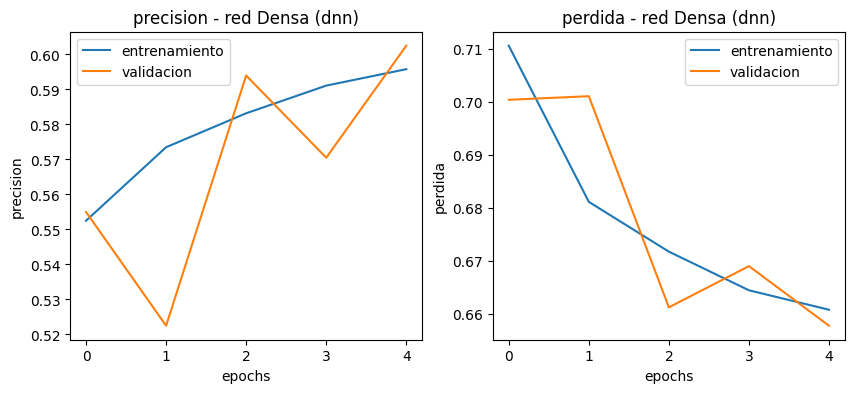

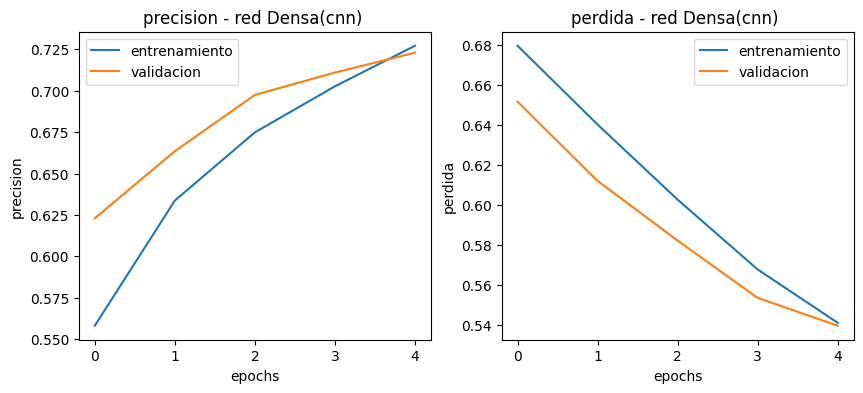

In [94]:
#graficación de precision y perdida de entrenamiento
def plot_history(history, title):
  plt.figure(figsize=(10,4))
  #precision
  plt.subplot(1,2,1)
  plt.plot(history.history['accuracy'], label ='entrenamiento')
  plt.plot(history.history['val_accuracy'], label ='validacion')
  plt.title(f'precision - {title}')
  plt.xlabel('epochs')
  plt.ylabel('precision')
  plt.legend()
  #perdida
  plt.subplot(1,2,2)
  plt.plot(history.history['loss'], label ='entrenamiento')
  plt.plot(history.history['val_loss'], label ='validacion')
  plt.title(f'perdida - {title}')
  plt.xlabel('epochs')
  plt.ylabel('perdida')
  plt.legend()
  #despliegue de perdida
  plt.show()
plot_history(history_dnn, "red Densa (dnn)")
plot_history(history_cnn, "red Densa(cnn) ")


In [51]:
#evaluar resultados
print('\Evaluacion DNN:')
model_dnn.evaluate(x_test, y_test)

print('\Evaluacion CNN:')
model_cnn.evaluate(x_test, y_test)


\Evaluacion DNN:
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.5221


<>:2: SyntaxWarning: invalid escape sequence '\E'
<>:5: SyntaxWarning: invalid escape sequence '\E'
<>:2: SyntaxWarning: invalid escape sequence '\E'
<>:5: SyntaxWarning: invalid escape sequence '\E'
/tmp/ipython-input-1381458051.py:2: SyntaxWarning: invalid escape sequence '\E'
  print('\Evaluacion DNN:')
/tmp/ipython-input-1381458051.py:5: SyntaxWarning: invalid escape sequence '\E'
  print('\Evaluacion CNN:')


\Evaluacion CNN:
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.5221


[0.5221078395843506, 1.0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


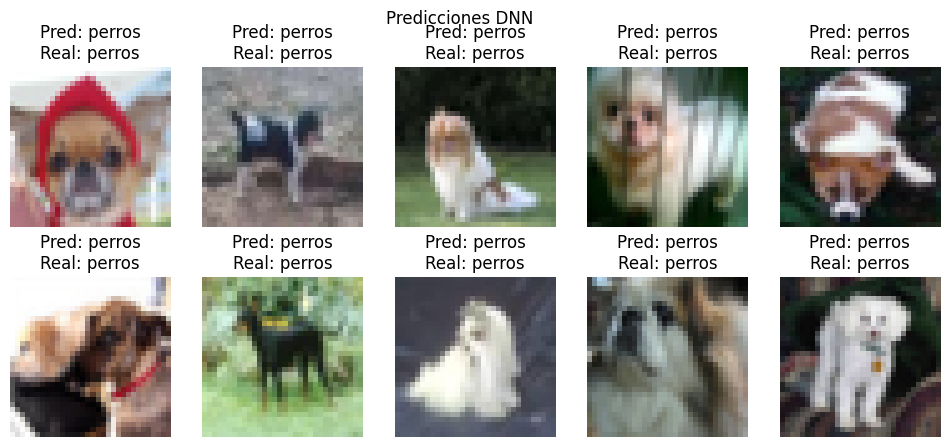

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


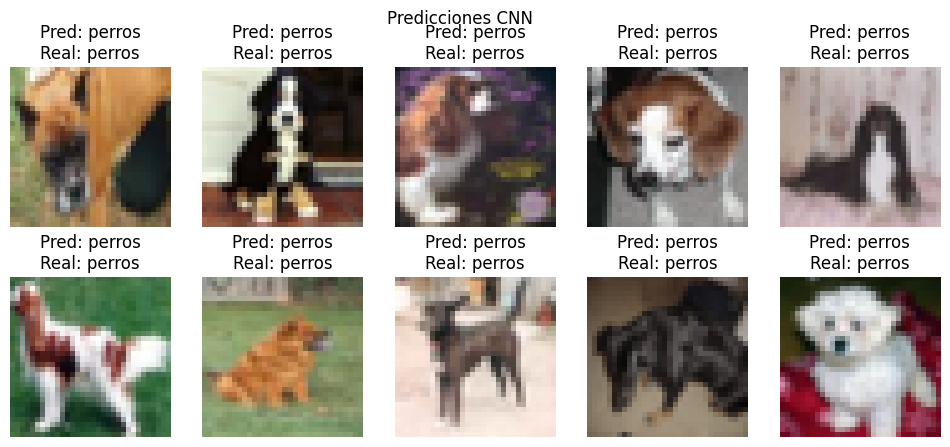

In [82]:
from IPython.core.pylabtools import figsize
# visualización de algunas predicciones
def show_predictions(model, x_data, y_data, n=10, title="Predicciones"):
  idx = np.random.choice(len(x_data), n)
  preds = (model.predict(x_data[idx]) > 0.5).astype(int)
  fig, axes = plt.subplots(2, n//2, figsize=(12,5))
  for i, ax in enumerate(axes.flat):
    ax.imshow(x_data[idx[i]])
    ax.set_title(f"Pred: {deseado.label if preds[i] == 1 else no_deseado.label}\nReal: {deseado.label if y_data[idx[i]] == 1 else no_deseado.label}")
    ax.axis("off")
  plt.suptitle(title)
  plt.show()

show_predictions(model_dnn, x_test, y_test, title="Predicciones DNN")
show_predictions(model_cnn, x_test, y_test, title="Predicciones CNN")

In [83]:
from google.colab import files
from tensorflow.keras.preprocessing import image

#subir imagen desde tu pc
uploaded = files.upload()
#mostramos el nombre del archivo subido
for fn in uploaded.keys():
  img_path =fn
  print("archivo cargado:", img_path)


Saving Imagen de WhatsApp 2025-11-08 a las 11.51.18_00336abc.jpg to Imagen de WhatsApp 2025-11-08 a las 11.51.18_00336abc (2).jpg
archivo cargado: Imagen de WhatsApp 2025-11-08 a las 11.51.18_00336abc (2).jpg


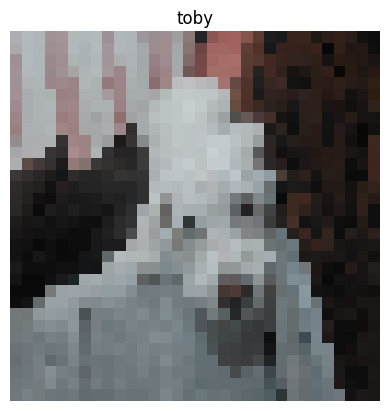

In [84]:
#gargar y preparar la imagen
img =image.load_img(img_path, target_size=(32,32))
img_array=image.img_to_array(img)/255.0
img_array=np.expand_dims(img_array, axis=0) # form(1,32,32,3)

plt.imshow(img)
plt.title("toby")
plt.axis("off")
plt.show()


In [85]:
#hacer prediccion
pred=model_cnn.predict(img_array)[0][0]
label =f"toby es un {perros.label if pred>0.5 else gatos.label}"
print(f"prediccion del modelo:{label}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
prediccion del modelo:toby es un perros


5. **mejora del modelo CNN para mayor precision**
Implementaremos más capas a nuestro modelo CNN para asegurar una precision entre el 80% y 90%

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


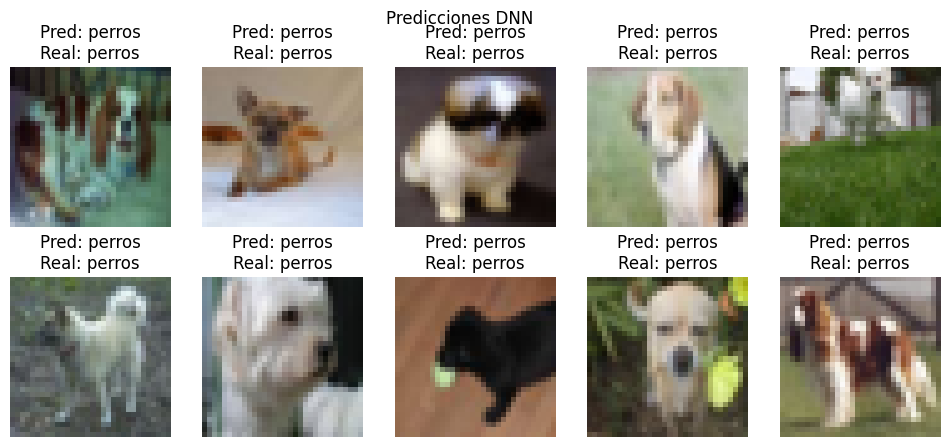

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


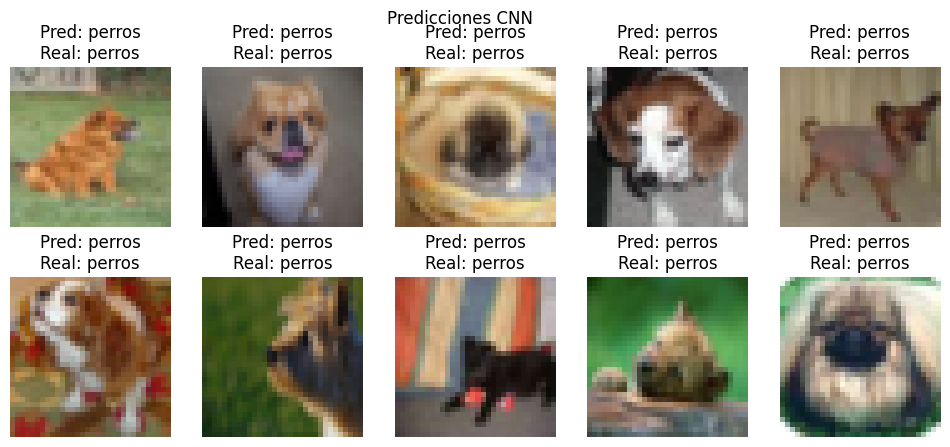

In [86]:
from IPython.core.pylabtools import figsize
# visualización de algunas predicciones
def show_predictions(model, x_data, y_data, n=10, title="Predicciones"):
  idx = np.random.choice(len(x_data), n)
  preds = (model.predict(x_data[idx]) > 0.5).astype(int)
  fig, axes = plt.subplots(2, n//2, figsize=(12,5))
  for i, ax in enumerate(axes.flat):
    ax.imshow(x_data[idx[i]])
    ax.set_title(f"Pred: {deseado.label if preds[i] == 1 else no_deseado.label}\nReal: {deseado.label if y_data[idx[i]] == 1 else no_deseado.label}")
    ax.axis("off")
  plt.suptitle(title)
  plt.show()

show_predictions(model_dnn, x_test, y_test, title="Predicciones DNN")
show_predictions(model_cnn, x_test, y_test, title="Predicciones CNN")

In [87]:
#hacer prediccion
pred=model_cnn.predict(img_array)[0][0]
label =f"toby es un {perros.label if pred>0.5 else gatos.label}"
print(f"prediccion del modelo:{label}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
prediccion del modelo:toby es un perros
